In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
df = pd.read_csv('smoking_drinking.csv')
print(df.head(5))

#Checking for missing values 
print(df.isnull().sum())
#Concluded no missing values

print(df['sex'].dtype)
print(df['DRK_YN'].dtype)


    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0          1   
1  Male   30     180      80       89.0         0.9          1.2          1   
2  Male   40     165      75       91.0         1.2          1.5          1   
3  Male   50     175      80       91.0         1.5          1.2          1   
4  Male   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0           1  120  ...        126            92        17.1              1   
1           1  130  ...        148           121        15.8              1   
2           1  120  ...         74           104        15.8              1   
3           1  145  ...        104           106        17.6              1   
4           1  138  ...        117           104        13.8              1   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP

In [30]:
df['DRK_YN'] = df['DRK_YN'].map({'Y': 1, 'N': 0, 'unknown': 0})
df['sex'] = df['sex'].map({'Male':1, 'Female':0})

X = df.drop('DRK_YN', axis = 1)
y = df['DRK_YN']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 16)


In [32]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)



/Users/yashwantviswanathan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


[[72038 27090]
 [29008 70134]]
Accuracy:  0.7170625914157462


In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.7170625914157462
Precision:  0.7213650950382622
Recall:  0.7074095741461742


In [36]:
from sklearn.metrics import roc_auc_score

auc = np.round(roc_auc_score(y_test, y_pred),3)
print("AUC: ", auc)

AUC:  0.717


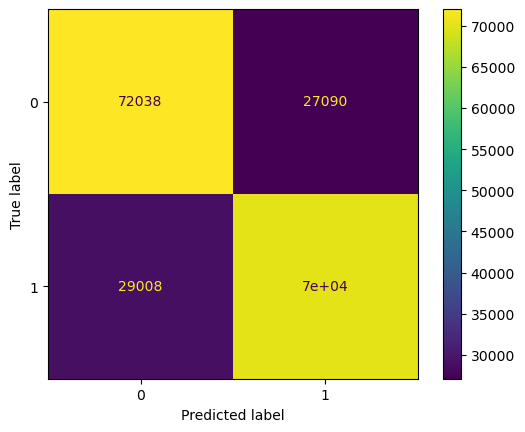

In [35]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()
